## Импорт необходимых библиотек

In [13]:
from matplotlib import pyplot as plt
from toolbox import *

In [14]:
def plot_spectrogram_hamming_window(signal, window_opt_len):
    """Построение трех спектрограмм с использованием окна Хэмминга.

    Args:
        signal: Отсчеты сигнала.
        window_opt_len: Размер окна.

    """
    plt.figure()
    # Малый размер окна
    plt.subplot(311)
    plt.title('Малый размер окна Хэмминга')
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal, 
                                                                   NFFT=8,window=np.hamming(8), 
                                                                   noverlap=0)
    plt.xlabel('Sample')
    plt.ylabel('Normalized Frequency')

    # Большой размер окна с шагом на один отсчёт
    plt.subplot(312)
    plt.title('Большой размер окна Хэмминга с шагом в один отсчёт')
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal, 
                                                                   NFFT=window_opt_len, 
                                                                   window=np.hamming(window_opt_len), 
                                                                   noverlap=window_opt_len-1)
    plt.xlabel('Sample')
    plt.ylabel('Normalized Frequency')

    # Большой размер окна с шагом на величину окна
    plt.subplot(313)
    plt.title('Больной размер окна Хэмминга с шагом на величину окна')
    powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal, 
                                                                   NFFT=window_opt_len, 
                                                                   window=np.hamming(window_opt_len), 
                                                                   noverlap=0)
    plt.xlabel('Sample')
    plt.ylabel('Normalized Frequency')

    plt.tight_layout() # автоматическая настройка отступов
    plt.show()

## Анализ сигнала с использованием спектрограмм и вейвлет-разложения

**Исходные параметры**

Частота дискретизации, ${f_d}$ - F_D;

Период дискретизации, ${t_d}$ - T_D;

Длительность импульса - T_IMPULSE;

Длительность рассматриваемого интервала - T_WINDOW;

Частота несущей - F_CARRIER;

Частота модуляции - F_MOD;

Глубина модуляции - I_MOD;

Количество импульсов - N_CHIPS.

In [15]:
F_D = 8e6               # частота дискретизации, Гц
T_D = 1/F_D             # период дискретизации, с
T_IMPULSE = 40e-6       # длительность импульса, с
T_WINDOW = 80e-6        # длительность рассматриваемого интервала, с
F_CARRIER = 0.80e6      # частота несущей, Гц
# Параметры модуляции
F_MOD = 0.6e6           # частота модуляции, Гц
I_MOD = 0.8             # глубина модуляции
N_CHIPS = 8             # количество импульсов

**Формирование последовательности отсчетов**

In [16]:
s_c = generate_sequence('chirp', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);   # ЛЧМ импульс
s_r = generate_sequence('radio', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);   # р/импульс
s_am = generate_sequence('AM', T_D, N_CHIPS, T_IMPULSE, F_CARRIER);     # АМ сигнал

**Отображение сигнала во временной области**

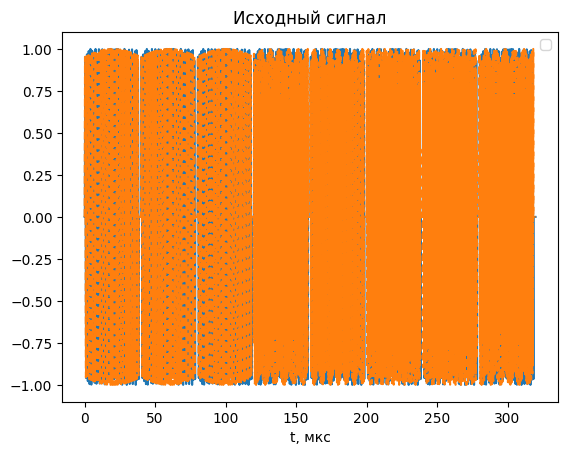

In [ ]:
signal_out = s_c  # выходной сигнал
plot_signal([[T_D, signal_out]])  # построение сигнала

**Анализ спектрограмм**

c:\Users\maksi\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\axes\_axes.py:8089: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


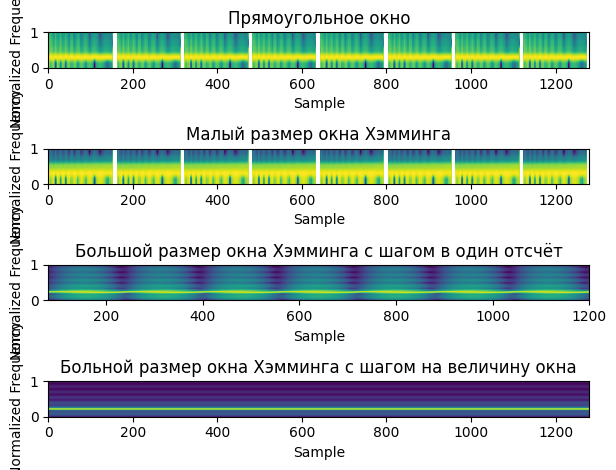

In [18]:
WINDOW_OPT_LEN = 320 # размер окна для построения спектрограммы
plt.figure()

# Прямоугольное окно
plt.subplot(411)
plt.title('Прямоугольное окно')
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=8,window=np.ones(8), noverlap=0)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')

# Малый размер окна
plt.subplot(412)
plt.title('Малый размер окна Хэмминга')
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=8,window=np.hamming(8), noverlap=0)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')

# Большой размер окна с шагом на один отсчёт
plt.subplot(413)
plt.title('Большой размер окна Хэмминга с шагом в один отсчёт')
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=WINDOW_OPT_LEN, window=np.hamming(WINDOW_OPT_LEN), noverlap=WINDOW_OPT_LEN-1)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')

# Большой размер окна с шагом на величину окна
plt.subplot(414)
plt.title('Больной размер окна Хэмминга с шагом на величину окна')
powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(signal_out, 
    NFFT=WINDOW_OPT_LEN, window=np.hamming(WINDOW_OPT_LEN), noverlap=0)
plt.xlabel('Sample')
plt.ylabel('Normalized Frequency')

plt.tight_layout() # автоматическая настройка отступов
plt.show()

**Анализ карт коэффициентов вейвлет-преобразования (скейлограмм)**

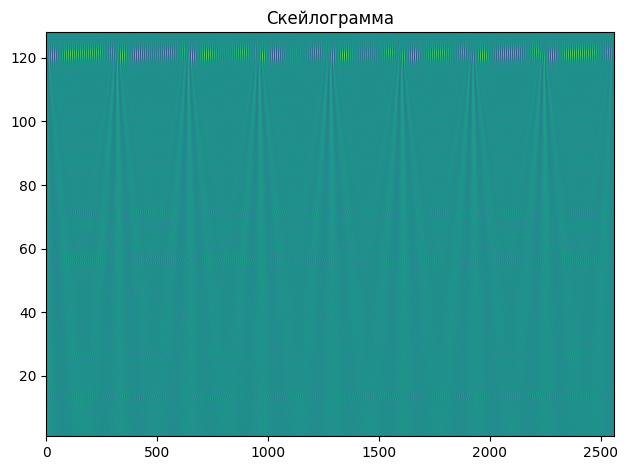

In [19]:
cwtmatr, freqs = pywt.cwt(signal_out, np.arange(1,128), 'morl')
plt.figure()
plt.title('Скейлограмма')
plt.imshow(cwtmatr, extent=[-0, len(signal_out), 1, 128], aspect='auto',
           vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
plt.tight_layout() # автоматическая настройка отступов  
plt.show()